In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def euler_method(f, y0, x0, xf, h):
    x_values = [x0]
    y_values = [y0]
    
    x = x0
    y = y0
    
    while x <= xf:
        y = y + h * f(x, y)
        x = x + h
        
        x_values.append(x)
        y_values.append(y)
    
    return x_values, y_values

def heun_method(f, y0, x0, xf, h):
    x_values = [x0]
    y_values = [y0]
    
    x = x0
    y = y0
    
    while x < xf:
        y_predictor = y + h * f(x, y)
        x_next = x + h
        y = y + h/2 * (f(x, y) + f(x_next, y_predictor))
        x = x_next
        
        x_values.append(x)
        y_values.append(y)
    
    return x_values, y_values

def taylor2_method(f, df_dx, y0, x0, xf, h):
    x_values = [x0]
    y_values = [y0]
    
    x = x0
    y = y0
    
    while x < xf:
        y = y + h * f(x, y) + (h**2 / 2) * df_dx(x, y)
        x = x + h
        
        x_values.append(x)
        y_values.append(y)
    
    return x_values, y_values

In [59]:
def plot_direction_field(f, xmin, xmax, ymin, ymax, xstep, ystep, unit=False, plot_streamlines=False, t_values=None, y_values=None, label_sol=None):
    """
    Graficar el campo de direcciones asociado a una ecuación diferencial de primer orden dy/dx = f(x, y).
    
    :param f: Función que define la ecuación diferencial f(x, y).
    :param xmin: Límite inferior del eje x.
    :param xmax: Límite superior del eje x.
    :param ymin: Límite inferior del eje y.
    :param ymax: Límite superior del eje y.
    :param xstep: Separación entre los puntos en el eje x.
    :param ystep: Separación entre los puntos en el eje y.
    :param unit: Booleano para graficar el campo unitario equivalente.
    :param plot_streamlines: Booleano para graficar las líneas de flujo o curvas solución.
    :param t_values: Valores de t para la solución numérica.
    :param y_values: Valores de y para la solución numérica.
    :param label_sol: Etiqueta para la solución numérica.
    """
    x = np.linspace(xmin, xmax, int((xmax - xmin) / xstep))
    y = np.linspace(ymin, ymax, int((ymax - ymin) / ystep))
    X, Y = np.meshgrid(x, y)
    U = np.ones_like(X)
    V = f(X, Y)
    
    if unit:
        N = np.sqrt(U**2 + V**2)
        U, V = U / N, V / N
    
    plt.figure(figsize=(10, 6))
    plt.quiver(X, Y, U, V, color='r')
    
    if plot_streamlines:
        plt.streamplot(X, Y, U, V, color='b')
    
    if t_values is not None and y_values is not None:
        plt.plot(t_values, y_values, label=label_sol, linewidth=2)
    
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Campo de Direcciones')
    if label_sol:
        plt.legend()
    plt.show()

In [91]:
# Inciso a

import math

def f(x, y):
    return 22 * np.exp(x / 5) - 5 * x - 25

def df_dx(x, y):
    return (22 / 5) * math.exp(x / 5) - 5

In [93]:
y0 = -3
x0 = 0
xf = 5
h = 0.1

x_euler, y_euler = euler_method(f, y0, x0, xf, h)
x_heun, y_heun = heun_method(f, y0, x0, xf, h)
x_taylor2, y_taylor2 = taylor2_method(f, df_dx, y0, x0, xf, h)

# Solución exacta
def exact_solution(x):
    return 110 * math.exp(x / 5) - (5 / 2) * x**2 - 25 * x - 110

# Solución exacta en los mismos puntos
y_exact_euler = [exact_solution(x) for x in x_euler]
y_exact_heun = [exact_solution(x) for x in x_heun]
y_exact_taylor2 = [exact_solution(x) for x in x_taylor2]

# Calcular errores
error_euler = np.linalg.norm(np.array(y_euler) - np.array(y_exact_euler), ord=2)
error_heun = np.linalg.norm(np.array(y_heun) - np.array(y_exact_heun), ord=2)
error_taylor2 = np.linalg.norm(np.array(y_taylor2) - np.array(y_exact_taylor2), ord=2)

print(f"Error Euler (L2): {error_euler}")
print(f"Error Heun (L2): {error_heun}")
print(f"Error Taylor 2 (L2): {error_taylor2}")

Error Euler (L2): 22.943448039683176
Error Heun (L2): 21.613710766459416
Error Taylor 2 (L2): 21.67233162955789


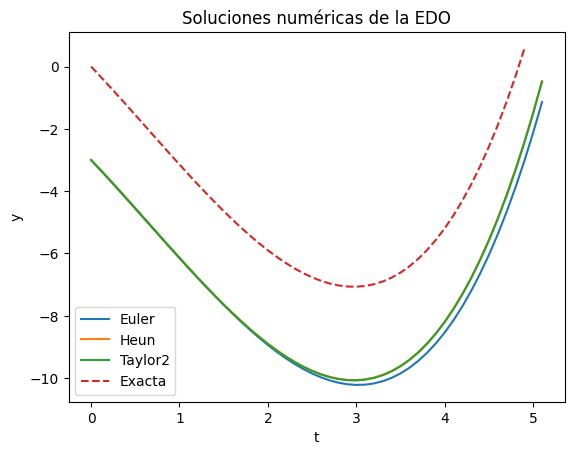

In [94]:
x_exact = np.arange(x0, xf, h)
y_exact = [exact_solution(x) for x in x_exact]

plt.plot(x_euler, y_euler, label='Euler')
plt.plot(x_heun, y_heun, label='Heun')
plt.plot(x_taylor2, y_taylor2, label='Taylor2')
plt.plot(x_exact, y_exact, label='Exacta', linestyle='dashed')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Soluciones numéricas de la EDO')
plt.show()


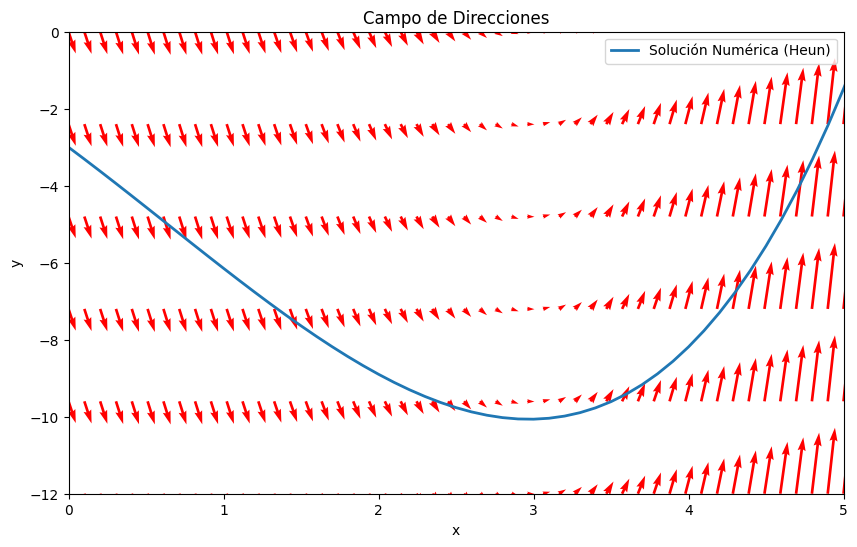

In [96]:
# Graficar el campo de direcciones y la solución numérica
plot_direction_field(
    f,
    xmin=x0,
    xmax=xf,
    ymin=-12,
    ymax=0,
    xstep=h,
    ystep=2,
    unit=False,
    plot_streamlines=False,
    t_values=x_heun,
    y_values=y_heun,
    label_sol='Solución Numérica (Heun)'
)

In [81]:
# Inciso b
import math

def f(x,y):
    return -np.sin(x)

def df_dx(x, y):
    return -math.cos(x)

In [82]:
y0 = 1
x0 = 0
xf = 6 * math.pi
h = 0.1

x_euler, y_euler = euler_method(f, y0, x0, xf, h)
x_heun, y_heun = heun_method(f, y0, x0, xf, h)
x_taylor2, y_taylor2 = taylor2_method(f, df_dx, y0, x0, xf, h)

# Solución exacta
x_exact = np.arange(x0, xf, h)
y_exact = np.cos(x_exact) - 1

# Solución exacta en los mismos puntos
y_exact_euler = [np.cos(x) - 1 for x in x_euler]
y_exact_heun = [np.cos(x) - 1 for x in x_heun]
y_exact_taylor2 = [np.cos(x) - 1 for x in x_taylor2]

# Calcular errores
error_euler = np.linalg.norm(np.array(y_euler) - np.array(y_exact_euler), ord=2)
error_heun = np.linalg.norm(np.array(y_heun) - np.array(y_exact_heun), ord=2)
error_taylor2 = np.linalg.norm(np.array(y_taylor2) - np.array(y_exact_taylor2), ord=2)

print(f"Error Euler (L2): {error_euler}")
print(f"Error Heun (L2): {error_heun}")
print(f"Error Taylor 2 (L2): {error_taylor2}")

Error Euler (L2): 13.804123589669096
Error Heun (L2): 13.795448893386625
Error Taylor 2 (L2): 13.761268771431439


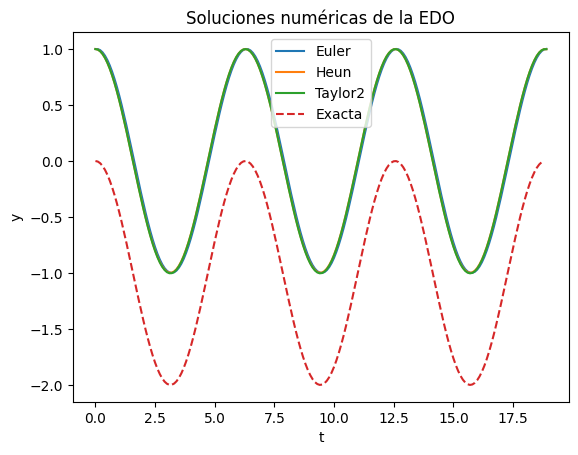

In [83]:
plt.plot(x_euler, y_euler, label='Euler')
plt.plot(x_heun, y_heun, label='Heun')
plt.plot(x_taylor2, y_taylor2, label='Taylor2')
plt.plot(x_exact, y_exact, label='Exacta', linestyle='dashed')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Soluciones numéricas de la EDO')
plt.show()


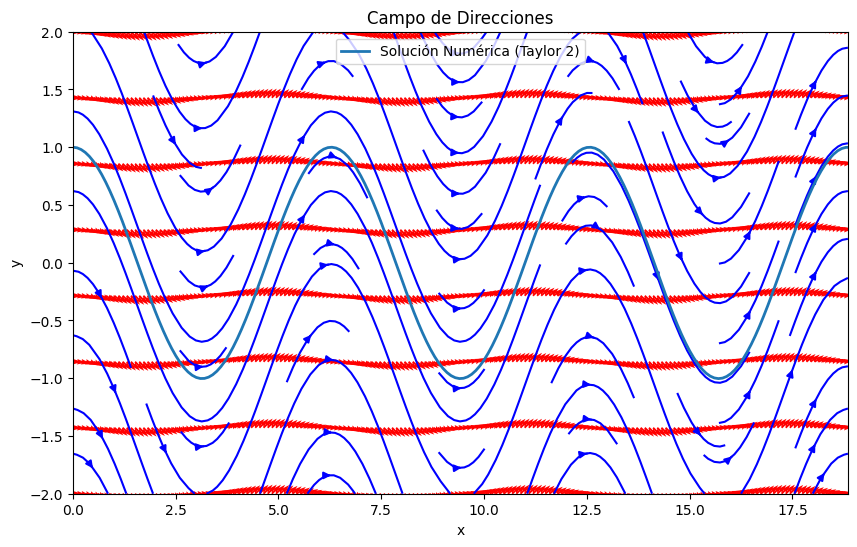

In [89]:
# Graficar el campo de direcciones y la solución numérica
plot_direction_field(
    f,
    xmin=x0,
    xmax=xf,
    ymin=-2,
    ymax=2,
    xstep=h,
    ystep=0.5,
    unit=False,
    plot_streamlines=True,
    t_values=x_taylor2,
    y_values=y_taylor2,
    label_sol='Solución Numérica (Taylor 2)'
)
    